In [ ]:
from sqlalchemy import create_engine
import pandas as pd
from urllib.parse import quote_plus 
import os

# Database connection details
db_config = {
    "host": os.getenv("DB_HOST"),
    "user": os.getenv("DB_USER"),
    "password": os.getenv("DB_PASSWORD"),
    "database": "makemytrip"
}
# Encode password to handle special characters
encoded_password = quote_plus(db_config["password"])
# Create MySQL Connection URL
db_url = f"mysql+pymysql://{db_config['user']}:{encoded_password}@{db_config['host']}/{db_config['database']}"

# Create SQLAlchemy Engine
engine = create_engine(db_url)

# Queries
query_flight = "SELECT * FROM Flight;"
query_hotel = "SELECT * FROM Hotel;"
query_car_rental = "SELECT * FROM CarRental;"

# Load Data
df_flight = pd.read_sql(query_flight, engine)
df_hotel = pd.read_sql(query_hotel, engine)
df_car_rental = pd.read_sql(query_car_rental, engine)

# Display samples
print("Flight Data:\n", df_flight.head())
print("Hotel Data:\n", df_hotel.head())
print("Car Rental Data:\n", df_car_rental.head())

Flight Data:
    travelCode  User_ID      Departure             Arrival  flightType  \
0           0        0    Recife (PE)  Florianopolis (SC)  firstClass   
1           2        0   Aracaju (SE)       Salvador (BH)  firstClass   
2           7        0   Aracaju (SE)       Salvador (BH)    economic   
3          11        0  Brasilia (DF)       Salvador (BH)     premium   
4          13        0    Recife (PE)  Florianopolis (SC)  firstClass   

   Flight_price  Flight_duration  Flight_Distance Flight_agency Departure_date  
0       1434.38             1.76           676.53   FlyingDrops     2019-09-26  
1       1684.05             2.16           830.86       CloudFy     2019-10-10  
2        964.83             2.16           830.86       CloudFy     2019-11-14  
3       1268.97             1.76           676.56       Rainbow     2019-12-12  
4       1434.38             1.76           676.53   FlyingDrops     2019-12-26  
Hotel Data:
    travelCode  User_ID Hotel_Name       Arrival_

Check for data cleaning!

In [2]:
print(df_flight.isnull().sum())
print(df_hotel.isnull().sum())
print(df_car_rental.isnull().sum())


travelCode         0
User_ID            0
Departure          0
Arrival            0
flightType         0
Flight_price       0
Flight_duration    0
Flight_Distance    0
Flight_agency      0
Departure_date     0
dtype: int64
travelCode             0
User_ID                0
Hotel_Name             0
Arrival_place          0
Hotel_stay             0
Hotel_per_day_price    0
Check_in               0
Hotel_TotalPrice       0
dtype: int64
travelCode            0
User_ID               0
Check_in              0
pickupLocation        0
dropoffLocation       0
carType               0
rentalAgency          0
rentalDuration        0
Car_total_distance    0
fuelPolicy            0
Car_bookingStatus     0
total_rent_price      0
dtype: int64


In [3]:
df_flight = df_flight.drop_duplicates()
df_hotel = df_hotel.drop_duplicates()
df_car_rental = df_car_rental.drop_duplicates()


In [4]:
print(df_flight.dtypes)
print(df_hotel.dtypes)
print(df_car_rental.dtypes)


travelCode                  int64
User_ID                     int64
Departure                  object
Arrival                    object
flightType                 object
Flight_price              float64
Flight_duration           float64
Flight_Distance           float64
Flight_agency              object
Departure_date     datetime64[ns]
dtype: object
travelCode                      int64
User_ID                         int64
Hotel_Name                     object
Arrival_place                  object
Hotel_stay                      int64
Hotel_per_day_price           float64
Check_in               datetime64[ns]
Hotel_TotalPrice              float64
dtype: object
travelCode                     int64
User_ID                        int64
Check_in              datetime64[ns]
pickupLocation                object
dropoffLocation               object
carType                       object
rentalAgency                  object
rentalDuration                 int64
Car_total_distance             i

In [5]:
df_flight['Departure_date'] = pd.to_datetime(df_flight['Departure_date'])
df_hotel['Check_in'] = pd.to_datetime(df_hotel['Check_in'])
df_car_rental['Check_in'] = pd.to_datetime(df_car_rental['Check_in'])


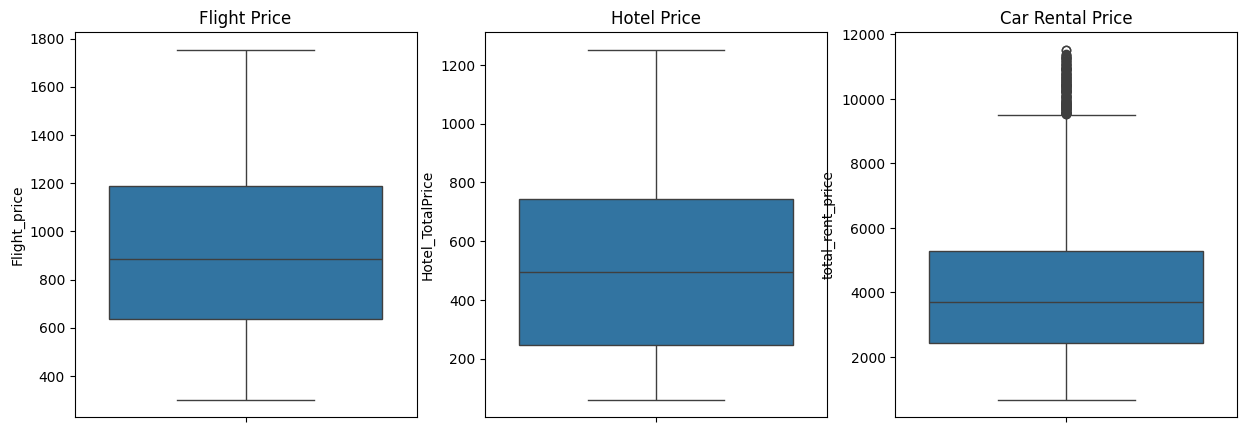

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots to detect outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df_flight['Flight_price'], ax=axes[0]).set_title('Flight Price')
sns.boxplot(y=df_hotel['Hotel_TotalPrice'], ax=axes[1]).set_title('Hotel Price')
sns.boxplot(y=df_car_rental['total_rent_price'], ax=axes[2]).set_title('Car Rental Price')
plt.show()


merging

In [7]:
df = df_flight.merge(df_hotel, on=['travelCode', 'User_ID'], how='left') \
              .merge(df_car_rental, on=['travelCode', 'User_ID'], how='left')


In [8]:
df.columns

Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check_in_x', 'Hotel_TotalPrice', 'Check_in_y',
       'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency',
       'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price'],
      dtype='object')

In [9]:
df= df.drop(columns=['Check_in_y'],axis=1)

In [10]:
df.columns

Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check_in_x', 'Hotel_TotalPrice',
       'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency',
       'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price'],
      dtype='object')

In [11]:
df.rename(columns={'Check_in_x':'Check_in'},inplace=True)

In [12]:
df.columns

Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check_in', 'Hotel_TotalPrice', 'pickupLocation',
       'dropoffLocation', 'carType', 'rentalAgency', 'rentalDuration',
       'Car_total_distance', 'fuelPolicy', 'Car_bookingStatus',
       'total_rent_price'],
      dtype='object')

Creating the Balanced Training Set

In [28]:
import pandas as pd
print("Before Balancing:", df['car_rental_status'].value_counts())

# Define the target variable (assuming 'car_rental_status' is 1 if booked, 0 if not)
df['car_rental_status'] = df['Car_total_distance'].fillna(0).apply(lambda x: 1 if x > 0 else 0)
  # 1 if booked, 0 if not

# Separate the two classes
df_booked = df[df['car_rental_status'] == 1]
df_not_booked = df[df['car_rental_status'] == 0]

# Downsample the majority class to match the minority class
min_class_size = min(len(df_booked), len(df_not_booked))
df_booked_sampled = df_booked.sample(n=min_class_size, random_state=42)
df_not_booked_sampled = df_not_booked.sample(n=min_class_size, random_state=42)

# Combine into a balanced dataset
df_balanced = pd.concat([df_booked_sampled, df_not_booked_sampled]).sample(frac=1, random_state=42)

# Display the class distribution
print(df_balanced['car_rental_status'].value_counts())
df_balanced.to_csv('balanced_data.csv', index=False)



Before Balancing: car_rental_status
0    36779
1     3773
Name: count, dtype: int64
car_rental_status
1    3773
0    3773
Name: count, dtype: int64


In [29]:
from sklearn.preprocessing import LabelEncoder

# Load balanced data
df_balanced = pd.read_csv('balanced_data.csv')

# Drop irrelevant columns (IDs, etc.)
df_balanced = df_balanced.drop(columns=['travelCode', 'User_ID'])

# Handle missing values (Fill NaNs with median for numerical columns)
for col in df_balanced.select_dtypes(include=['number']).columns:
    df_balanced[col] = df_balanced[col].fillna(df_balanced[col].median())

# Encode categorical variables using Label Encoding
label_encoders = {}
categorical_cols = df_balanced.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_balanced[col] = le.fit_transform(df_balanced[col])
    label_encoders[col] = le  # Save encoders for later use

# Display dataset info
print(df_balanced.info())

# Save the processed dataset
df_balanced.to_csv('processed_features.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7546 entries, 0 to 7545
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Departure            7546 non-null   int64  
 1   Arrival              7546 non-null   int64  
 2   flightType           7546 non-null   int64  
 3   Flight_price         7546 non-null   float64
 4   Flight_duration      7546 non-null   float64
 5   Flight_Distance      7546 non-null   float64
 6   Flight_agency        7546 non-null   int64  
 7   Departure_date       7546 non-null   int64  
 8   Hotel_Name           7546 non-null   int64  
 9   Arrival_place        7546 non-null   int64  
 10  Hotel_stay           7546 non-null   int64  
 11  Hotel_per_day_price  7546 non-null   float64
 12  Check_in             7546 non-null   int64  
 13  Hotel_TotalPrice     7546 non-null   float64
 14  pickupLocation       7546 non-null   int64  
 15  dropoffLocation      7546 non-null   i

In [30]:
from sklearn.model_selection import train_test_split

# Load processed dataset
df_balanced = pd.read_csv('processed_features.csv')

# Define features (X) and target variable (y)
X = df_balanced.drop(columns=['car_rental_status'])  # Features
y = df_balanced['car_rental_status']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

# Save training & testing sets for later use
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


Training set: (6036, 23), Testing set: (1510, 23)


In [31]:
import optuna
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Load the dataset
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()  # Flatten array

# Define objective function for Optuna tuning
def objective(trial):
    # Define base models with hyperparameters
    clf1 = RandomForestClassifier(
        n_estimators=trial.suggest_int("rf_n_estimators", 50, 300),
        max_depth=trial.suggest_int("rf_max_depth", 3, 20),
        random_state=42
    )
    
    clf2 = xgb.XGBClassifier(
        n_estimators=trial.suggest_int("xgb_n_estimators", 50, 300),
        max_depth=trial.suggest_int("xgb_max_depth", 3, 10),
        learning_rate=trial.suggest_float("xgb_learning_rate", 0.01, 0.3),
        random_state=42
    )
    
    # Define the stacking classifier
    stack_model = StackingClassifier(
        estimators=[('rf', clf1), ('xgb', clf2)],
        final_estimator=LogisticRegression(),
        cv=5
    )
    
    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(stack_model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Display best hyperparameters
print("Best hyperparameters:", study.best_params)


[I 2025-03-03 10:03:11,512] A new study created in memory with name: no-name-6ae3b0fb-cf76-4225-9915-9426d5be5522
[I 2025-03-03 10:03:28,924] Trial 0 finished with value: 1.0 and parameters: {'rf_n_estimators': 272, 'rf_max_depth': 18, 'xgb_n_estimators': 291, 'xgb_max_depth': 6, 'xgb_learning_rate': 0.10758865034348619}. Best is trial 0 with value: 1.0.
[I 2025-03-03 10:03:45,711] Trial 1 finished with value: 1.0 and parameters: {'rf_n_estimators': 281, 'rf_max_depth': 10, 'xgb_n_estimators': 156, 'xgb_max_depth': 7, 'xgb_learning_rate': 0.054216085312943696}. Best is trial 0 with value: 1.0.
[I 2025-03-03 10:03:57,481] Trial 2 finished with value: 1.0 and parameters: {'rf_n_estimators': 175, 'rf_max_depth': 13, 'xgb_n_estimators': 228, 'xgb_max_depth': 3, 'xgb_learning_rate': 0.24385301354503539}. Best is trial 0 with value: 1.0.
[I 2025-03-03 10:04:07,012] Trial 3 finished with value: 1.0 and parameters: {'rf_n_estimators': 117, 'rf_max_depth': 16, 'xgb_n_estimators': 242, 'xgb_max_

Best hyperparameters: {'rf_n_estimators': 272, 'rf_max_depth': 18, 'xgb_n_estimators': 291, 'xgb_max_depth': 6, 'xgb_learning_rate': 0.10758865034348619}


In [32]:
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load the train and test data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Best hyperparameters from Optuna
best_params = study.best_params

# Define the optimized base models
clf1 = RandomForestClassifier(
    n_estimators=best_params["rf_n_estimators"],
    max_depth=best_params["rf_max_depth"],
    random_state=42
)

clf2 = xgb.XGBClassifier(
    n_estimators=best_params["xgb_n_estimators"],
    max_depth=best_params["xgb_max_depth"],
    learning_rate=best_params["xgb_learning_rate"],
    random_state=42
)

# Define the stacking classifier
stack_model = StackingClassifier(
    estimators=[('rf', clf1), ('xgb', clf2)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Make predictions
y_pred = stack_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       755

    accuracy                           1.00      1510
   macro avg       1.00      1.00      1.00      1510
weighted avg       1.00      1.00      1.00      1510



feature importance

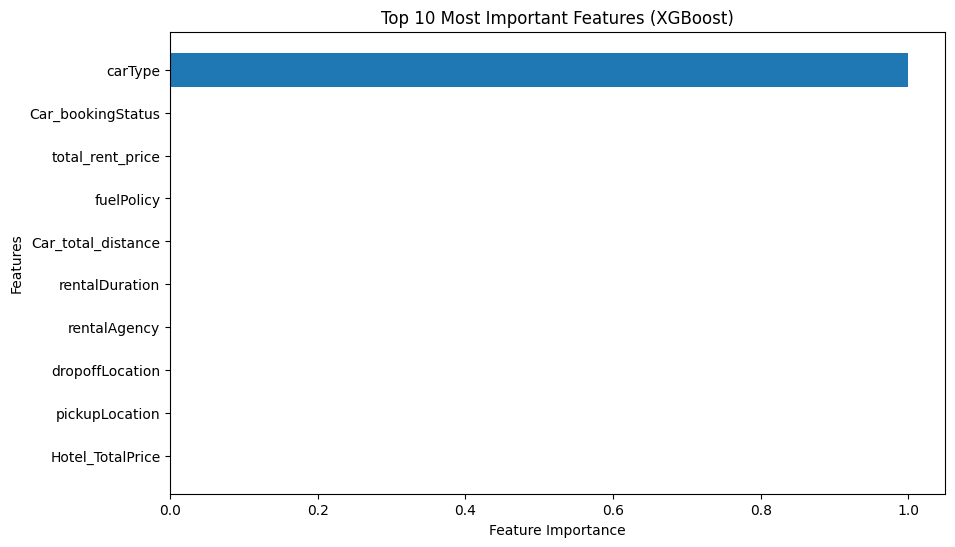

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb

# Load train dataset
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()

# Train an independent XGBoost model to check feature importance
xgb_model = xgb.XGBClassifier(
    n_estimators=study.best_params["xgb_n_estimators"],
    max_depth=study.best_params["xgb_max_depth"],
    learning_rate=study.best_params["xgb_learning_rate"],
    random_state=42
)

xgb_model.fit(X_train, y_train)  # Train the model

# Get feature importance
feature_importance = xgb_model.feature_importances_

# Sort and plot top features
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx][:10], feature_importance[sorted_idx][:10])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features (XGBoost)")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()


In [36]:
# Drop 'carType' from features
X_train = X_train.drop(columns=['carType'])
X_test = X_test.drop(columns=['carType'])

# Retrain the stacking model
stack_model.fit(X_train, y_train)

# Make new predictions
y_pred = stack_model.predict(X_test)

# Evaluate the model again
accuracy = accuracy_score(y_test, y_pred)
print(f"New Accuracy: {accuracy:.4f}")
print("Updated Classification Report:\n", classification_report(y_test, y_pred))


New Accuracy: 1.0000
Updated Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       755

    accuracy                           1.00      1510
   macro avg       1.00      1.00      1.00      1510
weighted avg       1.00      1.00      1.00      1510



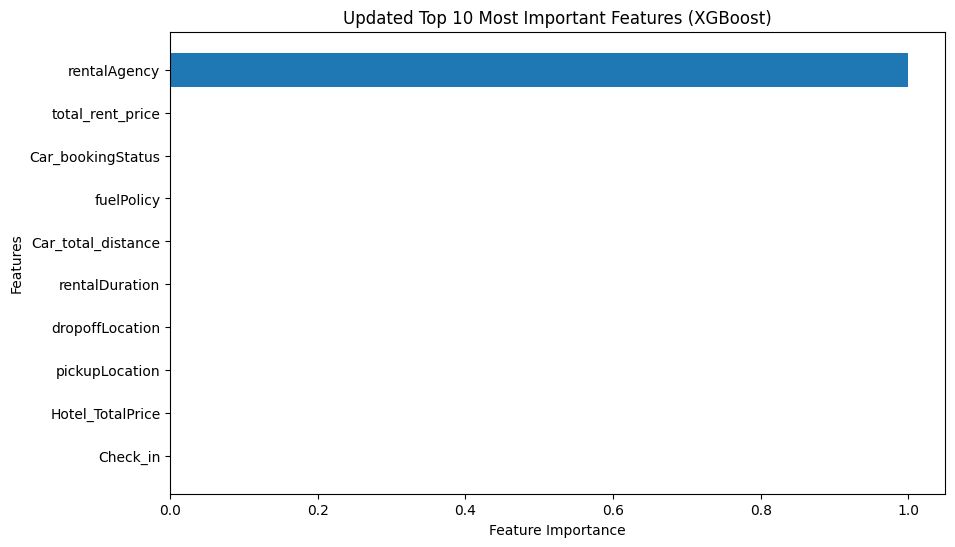

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Train a new XGBoost model on the modified dataset
xgb_model.fit(X_train, y_train)

# Get new feature importance
feature_importance = xgb_model.feature_importances_

# Sort and plot top features
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx][:10], feature_importance[sorted_idx][:10])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Updated Top 10 Most Important Features (XGBoost)")
plt.gca().invert_yaxis()
plt.show()


In [38]:
# Drop 'rentalAgency' from features
X_train = X_train.drop(columns=['rentalAgency'])
X_test = X_test.drop(columns=['rentalAgency'])

# Retrain the stacking model
stack_model.fit(X_train, y_train)

# Make new predictions
y_pred = stack_model.predict(X_test)

# Evaluate the model again
accuracy = accuracy_score(y_test, y_pred)
print(f"New Accuracy: {accuracy:.4f}")
print("Updated Classification Report:\n", classification_report(y_test, y_pred))


New Accuracy: 1.0000
Updated Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       755

    accuracy                           1.00      1510
   macro avg       1.00      1.00      1.00      1510
weighted avg       1.00      1.00      1.00      1510



In [39]:
import pandas as pd

# Check correlation with the target variable
correlation = df_balanced.corr()['car_rental_status'].abs().sort_values(ascending=False)

# Display the top correlated features (excluding car_rental_status itself)
print("Top correlated features with car_rental_status:\n")
print(correlation.drop('car_rental_status').head(10))


Top correlated features with car_rental_status:

fuelPolicy           0.868990
Car_bookingStatus    0.865655
carType              0.841107
rentalAgency         0.833407
dropoffLocation      0.776472
pickupLocation       0.775344
total_rent_price     0.132728
Flight_agency        0.018599
Hotel_stay           0.017180
Hotel_TotalPrice     0.015256
Name: car_rental_status, dtype: float64


In [40]:
# Drop leakage features
leakage_features = ['fuelPolicy', 'Car_bookingStatus', 'carType', 'rentalAgency', 'dropoffLocation', 'pickupLocation']
df_balanced_cleaned = df_balanced.drop(columns=leakage_features)

# Define new X and y
X_cleaned = df_balanced_cleaned.drop(columns=['car_rental_status'])
y_cleaned = df_balanced_cleaned['car_rental_status']

# Split into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

# Print new shape
print("New Training Data Shape:", X_train.shape)
print("New Testing Data Shape:", X_test.shape)


New Training Data Shape: (6036, 17)
New Testing Data Shape: (1510, 17)


In [43]:
# Train the stacking model
stack_model.fit(X_train, y_train)

# Predict on test set
y_pred = stack_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"New Accuracy: {accuracy:.4f}")

print("Updated Classification Report:")
print(classification_report(y_test, y_pred))


New Accuracy: 1.0000
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       755

    accuracy                           1.00      1510
   macro avg       1.00      1.00      1.00      1510
weighted avg       1.00      1.00      1.00      1510



In [46]:
# Remove highly correlated features
high_corr_features = ["Car_bookingStatus", "fuelPolicy", "carType", "rentalAgency", "dropoffLocation", "pickupLocation"]

X_train_filtered = X_train.drop(columns=high_corr_features)
X_test_filtered = X_test.drop(columns=high_corr_features)

# Retrain the model
stacking_model.fit(X_train_filtered, y_train)
y_pred_filtered = stacking_model.predict(X_test_filtered)

# Evaluate again
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
print(f"New Accuracy after Fix: {accuracy_filtered:.4f}")
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_filtered))


KeyError: "['Car_bookingStatus', 'fuelPolicy', 'carType', 'rentalAgency', 'dropoffLocation', 'pickupLocation'] not found in axis"

In [45]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stack_model, X_train_filtered, y_train, cv=cv, scoring="accuracy")

print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


NameError: name 'X_train_filtered' is not defined

Creating the Dataset for Car Recommendation

In [14]:
# Create a dataset with only users who did NOT book a car
df_recommendation = df[df['car_rental_status'] == 0].copy()

# Drop car-related columns to simulate a user needing a recommendation
car_related_cols = [col for col in df_recommendation.columns if 'car' in col.lower()]
df_recommendation.drop(columns=car_related_cols, inplace=True, errors='ignore')

# Display the first few rows
print(df_recommendation.head())
print(f"Total records in recommendation dataset: {len(df_recommendation)}")


   travelCode  User_ID      Departure             Arrival  flightType  \
0           0        0    Recife (PE)  Florianopolis (SC)  firstClass   
1           2        0   Aracaju (SE)       Salvador (BH)  firstClass   
2           7        0   Aracaju (SE)       Salvador (BH)    economic   
3          11        0  Brasilia (DF)       Salvador (BH)     premium   
4          13        0    Recife (PE)  Florianopolis (SC)  firstClass   

   Flight_price  Flight_duration  Flight_Distance Flight_agency  \
0       1434.38             1.76           676.53   FlyingDrops   
1       1684.05             2.16           830.86       CloudFy   
2        964.83             2.16           830.86       CloudFy   
3       1268.97             1.76           676.56       Rainbow   
4       1434.38             1.76           676.53   FlyingDrops   

  Departure_date  ... Hotel_stay Hotel_per_day_price   Check_in  \
0     2019-09-26  ...          4              313.02 2019-09-26   
1     2019-10-10  ...   

In [15]:
# Drop columns that are not useful for prediction in df_balanced
df_balanced = df_balanced.drop(columns=['travelCode', 'User_ID'], errors='ignore')

# Display updated columns
print("Columns after dropping unnecessary ones in df_balanced:")
print(df_balanced.columns)


Columns after dropping unnecessary ones in df_balanced:
Index(['Departure', 'Arrival', 'flightType', 'Flight_price', 'Flight_duration',
       'Flight_Distance', 'Flight_agency', 'Departure_date', 'Hotel_Name',
       'Arrival_place', 'Hotel_stay', 'Hotel_per_day_price', 'Check_in',
       'Hotel_TotalPrice', 'pickupLocation', 'dropoffLocation', 'carType',
       'rentalAgency', 'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price', 'car_rental_status'],
      dtype='object')


In [16]:
print("Columns in df_recommendation:", df_recommendation.columns)
print("First few rows of df_recommendation:")
print(df_recommendation.head())


Columns in df_recommendation: Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check_in', 'Hotel_TotalPrice', 'pickupLocation',
       'dropoffLocation', 'rentalAgency', 'rentalDuration', 'fuelPolicy',
       'total_rent_price'],
      dtype='object')
First few rows of df_recommendation:
   travelCode  User_ID      Departure             Arrival  flightType  \
0           0        0    Recife (PE)  Florianopolis (SC)  firstClass   
1           2        0   Aracaju (SE)       Salvador (BH)  firstClass   
2           7        0   Aracaju (SE)       Salvador (BH)    economic   
3          11        0  Brasilia (DF)       Salvador (BH)     premium   
4          13        0    Recife (PE)  Florianopolis (SC)  firstClass   

   Flight_price  Flight_duration  Flight_Distance Flight_agency  \
0    

In [17]:
# Recreate df_recommendation with users who did NOT book a car
df_recommendation = df[df['car_rental_status'] == 0].copy()

# Drop the 'car_rental_status' column after filtering
df_recommendation.drop(columns=['car_rental_status', 'travelCode', 'User_ID'], inplace=True, errors='ignore')

# Verify the shape and columns
print("Shape of df_recommendation:", df_recommendation.shape)
print("Columns in df_recommendation:", df_recommendation.columns)


Shape of df_recommendation: (36779, 23)
Columns in df_recommendation: Index(['Departure', 'Arrival', 'flightType', 'Flight_price', 'Flight_duration',
       'Flight_Distance', 'Flight_agency', 'Departure_date', 'Hotel_Name',
       'Arrival_place', 'Hotel_stay', 'Hotel_per_day_price', 'Check_in',
       'Hotel_TotalPrice', 'pickupLocation', 'dropoffLocation', 'carType',
       'rentalAgency', 'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price'],
      dtype='object')


In [18]:
# Drop car-related columns
car_related_cols = ['carType', 'Car_total_distance', 'Car_bookingStatus']
df_recommendation.drop(columns=car_related_cols, inplace=True, errors='ignore')

# Verify changes
print("Shape of df_recommendation after dropping car-related columns:", df_recommendation.shape)
print("Columns in df_recommendation:", df_recommendation.columns)


Shape of df_recommendation after dropping car-related columns: (36779, 20)
Columns in df_recommendation: Index(['Departure', 'Arrival', 'flightType', 'Flight_price', 'Flight_duration',
       'Flight_Distance', 'Flight_agency', 'Departure_date', 'Hotel_Name',
       'Arrival_place', 'Hotel_stay', 'Hotel_per_day_price', 'Check_in',
       'Hotel_TotalPrice', 'pickupLocation', 'dropoffLocation', 'rentalAgency',
       'rentalDuration', 'fuelPolicy', 'total_rent_price'],
      dtype='object')


Feature Engineering

In [19]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (excluding the target variable)
categorical_cols = df_recommendation.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_recommendation[col] = le.fit_transform(df_recommendation[col])
    label_encoders[col] = le  # Store encoders for later use

# Verify changes
print("Categorical columns after encoding:", categorical_cols)
print("Sample data:\n", df_recommendation.head())


Categorical columns after encoding: ['Departure', 'Arrival', 'flightType', 'Flight_agency', 'Hotel_Name', 'Arrival_place', 'pickupLocation', 'dropoffLocation', 'rentalAgency', 'fuelPolicy']
Sample data:
    Departure  Arrival  flightType  Flight_price  Flight_duration  \
0          5        3           1       1434.38             1.76   
1          0        7           1       1684.05             2.16   
2          0        7           0        964.83             2.16   
3          1        7           2       1268.97             1.76   
4          5        3           1       1434.38             1.76   

   Flight_Distance  Flight_agency Departure_date  Hotel_Name  Arrival_place  \
0           676.53              1     2019-09-26           0              3   
1           830.86              0     2019-10-10           7              7   
2           830.86              0     2019-11-14           7              7   
3           676.56              2     2019-12-12           7           

Handling Missing Values

In [20]:
# Fill missing values with 0
df_recommendation[['rentalDuration', 'total_rent_price']] = df_recommendation[['rentalDuration', 'total_rent_price']].fillna(0)

# Verify that there are no NaN values left
print("Missing values after filling:\n", df_recommendation.isnull().sum())


Missing values after filling:
 Departure              0
Arrival                0
flightType             0
Flight_price           0
Flight_duration        0
Flight_Distance        0
Flight_agency          0
Departure_date         0
Hotel_Name             0
Arrival_place          0
Hotel_stay             0
Hotel_per_day_price    0
Check_in               0
Hotel_TotalPrice       0
pickupLocation         0
dropoffLocation        0
rentalAgency           0
rentalDuration         0
fuelPolicy             0
total_rent_price       0
dtype: int64


Feature Engineering on Date Columns

In [21]:
# Convert date columns to datetime format
df_recommendation['Departure_date'] = pd.to_datetime(df_recommendation['Departure_date'])
df_recommendation['Check_in'] = pd.to_datetime(df_recommendation['Check_in'])

# Extract useful date features
df_recommendation['Departure_Year'] = df_recommendation['Departure_date'].dt.year
df_recommendation['Departure_Month'] = df_recommendation['Departure_date'].dt.month
df_recommendation['Departure_Day'] = df_recommendation['Departure_date'].dt.day
df_recommendation['Departure_Weekday'] = df_recommendation['Departure_date'].dt.weekday  # Monday = 0, Sunday = 6

df_recommendation['Checkin_Year'] = df_recommendation['Check_in'].dt.year
df_recommendation['Checkin_Month'] = df_recommendation['Check_in'].dt.month
df_recommendation['Checkin_Day'] = df_recommendation['Check_in'].dt.day
df_recommendation['Checkin_Weekday'] = df_recommendation['Check_in'].dt.weekday  # Monday = 0, Sunday = 6

# Drop original date columns
df_recommendation.drop(columns=['Departure_date', 'Check_in'], inplace=True)

# Verify the new features
print(df_recommendation.head())


   Departure  Arrival  flightType  Flight_price  Flight_duration  \
0          5        3           1       1434.38             1.76   
1          0        7           1       1684.05             2.16   
2          0        7           0        964.83             2.16   
3          1        7           2       1268.97             1.76   
4          5        3           1       1434.38             1.76   

   Flight_Distance  Flight_agency  Hotel_Name  Arrival_place  Hotel_stay  ...  \
0           676.53              1           0              3           4  ...   
1           830.86              0           7              7           2  ...   
2           830.86              0           7              7           3  ...   
3           676.56              2           7              7           4  ...   
4           676.53              1           0              3           1  ...   

   fuelPolicy  total_rent_price  Departure_Year  Departure_Month  \
0           0               0.0     

In [22]:
# Check for missing values
print(df_recommendation.isnull().sum())


Departure              0
Arrival                0
flightType             0
Flight_price           0
Flight_duration        0
Flight_Distance        0
Flight_agency          0
Hotel_Name             0
Arrival_place          0
Hotel_stay             0
Hotel_per_day_price    0
Hotel_TotalPrice       0
pickupLocation         0
dropoffLocation        0
rentalAgency           0
rentalDuration         0
fuelPolicy             0
total_rent_price       0
Departure_Year         0
Departure_Month        0
Departure_Day          0
Departure_Weekday      0
Checkin_Year           0
Checkin_Month          0
Checkin_Day            0
Checkin_Weekday        0
dtype: int64


In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_balanced.drop(columns=['car_rental_status'])
y = df_balanced['car_rental_status']

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to verify
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Target distribution in train:\n{y_train.value_counts()}")
print(f"Target distribution in test:\n{y_test.value_counts()}")


Train shape: (6036, 23), Test shape: (1510, 23)
Target distribution in train:
car_rental_status
0    3018
1    3018
Name: count, dtype: int64
Target distribution in test:
car_rental_status
1    755
0    755
Name: count, dtype: int64


In [24]:
# Convert datetime columns into numeric features
X_train["Departure_Year"] = X_train["Departure_date"].dt.year
X_train["Departure_Month"] = X_train["Departure_date"].dt.month
X_train["Departure_Day"] = X_train["Departure_date"].dt.day
X_train["Departure_Weekday"] = X_train["Departure_date"].dt.weekday

X_train["Checkin_Year"] = X_train["Check_in"].dt.year
X_train["Checkin_Month"] = X_train["Check_in"].dt.month
X_train["Checkin_Day"] = X_train["Check_in"].dt.day
X_train["Checkin_Weekday"] = X_train["Check_in"].dt.weekday

X_test["Departure_Year"] = X_test["Departure_date"].dt.year
X_test["Departure_Month"] = X_test["Departure_date"].dt.month
X_test["Departure_Day"] = X_test["Departure_date"].dt.day
X_test["Departure_Weekday"] = X_test["Departure_date"].dt.weekday

X_test["Checkin_Year"] = X_test["Check_in"].dt.year
X_test["Checkin_Month"] = X_test["Check_in"].dt.month
X_test["Checkin_Day"] = X_test["Check_in"].dt.day
X_test["Checkin_Weekday"] = X_test["Check_in"].dt.weekday

# Drop original datetime columns since they are now converted
X_train.drop(columns=["Departure_date", "Check_in"], inplace=True)
X_test.drop(columns=["Departure_date", "Check_in"], inplace=True)


In [ ]:
import xgboost as xgb
import optuna
from sklearn.metrics import accuracy_score, classification_report

# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0)
    }
    
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final model with best parameters
best_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Optimized Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best))


In [ ]:
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# # 1️⃣ Load Your Data
# df = pd.read_csv("your_data.csv")  

# # 2️⃣ Handle Categorical Features
# cat_cols = df.select_dtypes(include=['object', 'category']).columns
# for col in cat_cols:
#     df[col] = LabelEncoder().fit_transform(df[col])

# # Convert datetime columns to numerical values
# datetime_cols = df.select_dtypes(include=['datetime']).columns
# for col in datetime_cols:
#     df[col] = df[col].astype(int) // 10**9  

# # 3️⃣ Split Data into Train & Test
# X = df.drop(columns=["car_rental_status"])
# y = df["car_rental_status"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4️⃣ Define Base Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# 5️⃣ Define Optuna Objective Function for Stacking
def stacking_objective(trial):
    # Tune meta-classifier (Logistic Regression)
    C = trial.suggest_loguniform('C', 0.01, 10.0)
    meta_model = LogisticRegression(C=C, max_iter=1000)

    stacking_model = StackingClassifier(
        estimators=[('rf', models['Random Forest']), ('gb', models['Gradient Boosting']), ('xgb', models['XGBoost'])],
        final_estimator=meta_model,
        stack_method='predict_proba'
    )

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(stacking_model, X_train, y_train, cv=cv, scoring='accuracy')
    
    return scores.mean()

# 6️⃣ Run Optuna Optimization
stacking_study = optuna.create_study(direction="maximize")
stacking_study.optimize(stacking_objective, n_trials=10)

# 7️⃣ Train Stacking Model with Best Hyperparameters
best_C = stacking_study.best_params['C']
meta_model = LogisticRegression(C=best_C, max_iter=1000)

final_stacking_model = StackingClassifier(
    estimators=[('rf', models['Random Forest']), ('gb', models['Gradient Boosting']), ('xgb', models['XGBoost'])],
    final_estimator=meta_model,
    stack_method='predict_proba'
)

final_stacking_model.fit(X_train, y_train)

# 8️⃣ Model Evaluation
y_pred = final_stacking_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
